In [1]:
import pandas as pd

In [2]:
from pathlib import Path

part_path = Path("part-1")
part_path.mkdir(exist_ok=True)

raw_path = Path(f"{part_path}/raw")
raw_path.mkdir(exist_ok=True)

processed_path = Path(f"{part_path}/processed")
processed_path.mkdir(exist_ok=True)

submission_path = Path(f"{part_path}/submission")
submission_path.mkdir(exist_ok=True)

In [3]:
df_train = pd.read_csv(f"{processed_path}/train-embeddings.csv")
df_test = pd.read_csv(f"{processed_path}/test-embeddings.csv")

In [4]:
df_train.head()

,id,project_a,project_b,weight_a,weight_b,description,created_at,updated_at,size,has_wiki,...,num_dependents_ratio,v_index_ratio,stars_intersection_v_index,stars_b_intersection_v_index_b,stars_ratio_intersection_v_index_ratio,embedding,cosine_similarity,embedding_b,cosine_similarity_b,cosine_ratio
0,2,prettier-solidity/prettier-plugin-solidity,nomicfoundation/hardhat,0.101669,0.898331,A Prettier plugin for automatically formatting...,2018-05-15T15:12:02Z,2025-02-04T11:20:22Z,4658,True,...,0.493794,0.0,0.000731,0.007483,8.899440e-08,"[-0.04209323972463608, -0.02419881708920002, -...",0.210393,"[-0.02257283218204975, -0.009097057394683361, ...",0.431414,0.327813
1,3,prettier-solidity/prettier-plugin-solidity,consensys/teku,0.669446,0.330554,A Prettier plugin for automatically formatting...,2018-05-15T15:12:02Z,2025-02-04T11:20:22Z,4658,True,...,1.000000,0.0,0.000731,0.000692,5.137034e-07,"[-0.04209323972463608, -0.02419881708920002, -...",0.210393,"[0.005951829720288515, 0.007955850102007389, 0...",0.350827,0.374884
2,4,prettier-solidity/prettier-plugin-solidity,ethereum/solidity,0.449022,0.550978,A Prettier plugin for automatically formatting...,2018-05-15T15:12:02Z,2025-02-04T11:20:22Z,4658,True,...,1.000000,0.0,0.000731,0.023833,2.975900e-08,"[-0.04209323972463608, -0.02419881708920002, -...",0.210393,"[0.011530175805091858, -0.009474721737205982, ...",0.411826,0.338132
3,5,prettier-solidity/prettier-plugin-solidity,ethereum/remix-project,0.498396,0.501604,A Prettier plugin for automatically formatting...,2018-05-15T15:12:02Z,2025-02-04T11:20:22Z,4658,True,...,0.982363,0.0,0.000731,0.002575,2.211131e-07,"[-0.04209323972463608, -0.02419881708920002, -...",0.210393,"[-0.03322716802358627, -0.0014064910355955362,...",0.386641,0.352396
4,6,prettier-solidity/prettier-plugin-solidity,ethereum/go-ethereum,0.272503,0.727497,A Prettier plugin for automatically formatting...,2018-05-15T15:12:02Z,2025-02-04T11:20:22Z,4658,True,...,0.735799,0.0,0.000731,144819.048273,1.491715e-08,"[-0.04209323972463608, -0.02419881708920002, -...",0.210393,"[0.00618064496666193, 0.03895679488778114, 0.0...",0.483286,0.303299


In [23]:
df_train.columns

Index(['id', 'project_a', 'project_b', 'weight_a', 'weight_b', 'description',
       'created_at', 'updated_at', 'size', 'has_wiki', 'stars', 'watchers',
       'forks', 'open_issues', 'subscribers_count', 'description_b',
       'created_at_b', 'updated_at_b', 'size_b', 'has_wiki_b', 'stars_b',
       'watchers_b', 'forks_b', 'open_issues_b', 'subscribers_count_b',
       'commit_code', 'forked', 'issue_closed', 'issue_comment',
       'issue_opened', 'issue_reopened', 'pull_request_closed',
       'pull_request_merged', 'pull_request_opened', 'pull_request_reopened',
       'pull_request_review_comment', 'release_published', 'starred',
       'commit_code_b', 'forked_b', 'issue_closed_b', 'issue_comment_b',
       'issue_opened_b', 'issue_reopened_b', 'pull_request_closed_b',
       'pull_request_merged_b', 'pull_request_opened_b',
       'pull_request_reopened_b', 'pull_request_review_comment_b',
       'release_published_b', 'starred_b', 'num_dependents', 'dependency_rank',
       

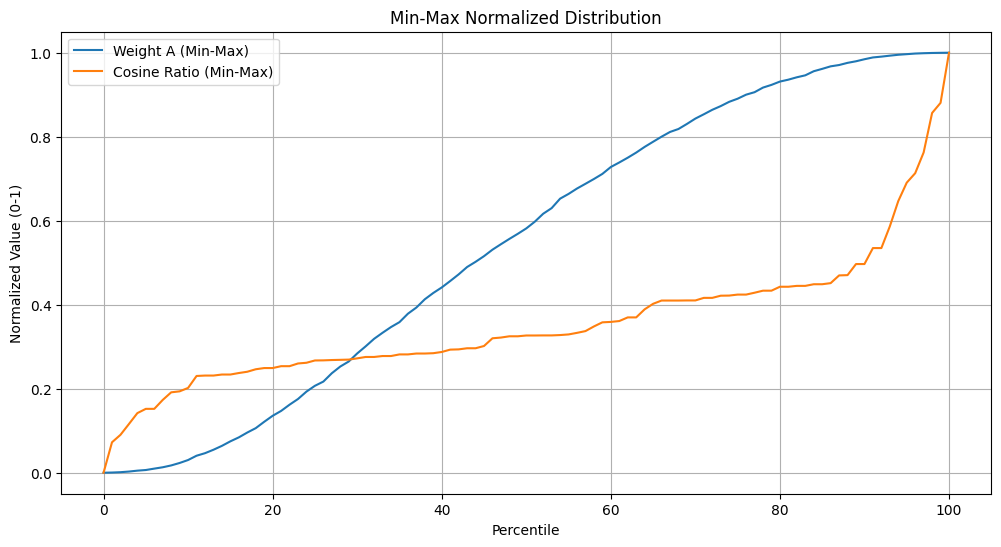

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate percentiles for both columns
percentiles = np.arange(0, 101, 1)

# Method 1: Min-Max Normalization (values between 0 and 1)
weight_a_minmax = (df_train['weight_a'] - df_train['weight_a'].min()) / (df_train['weight_a'].max() - df_train['weight_a'].min())
cosine_ratio_minmax = (df_train['cosine_similarity'] - df_train['cosine_similarity'].min()) / (df_train['cosine_similarity'].max() - df_train['cosine_similarity'].min())

# Min-Max normalized plot
plt.figure(figsize=(12, 6))
plt.plot(percentiles, np.percentile(weight_a_minmax, percentiles), label='Weight A (Min-Max)')
plt.plot(percentiles, np.percentile(cosine_ratio_minmax, percentiles), label='Cosine Ratio (Min-Max)')
plt.xlabel('Percentile')
plt.ylabel('Normalized Value (0-1)')
plt.title('Min-Max Normalized Distribution')
plt.legend()
plt.grid(True)
plt.show()



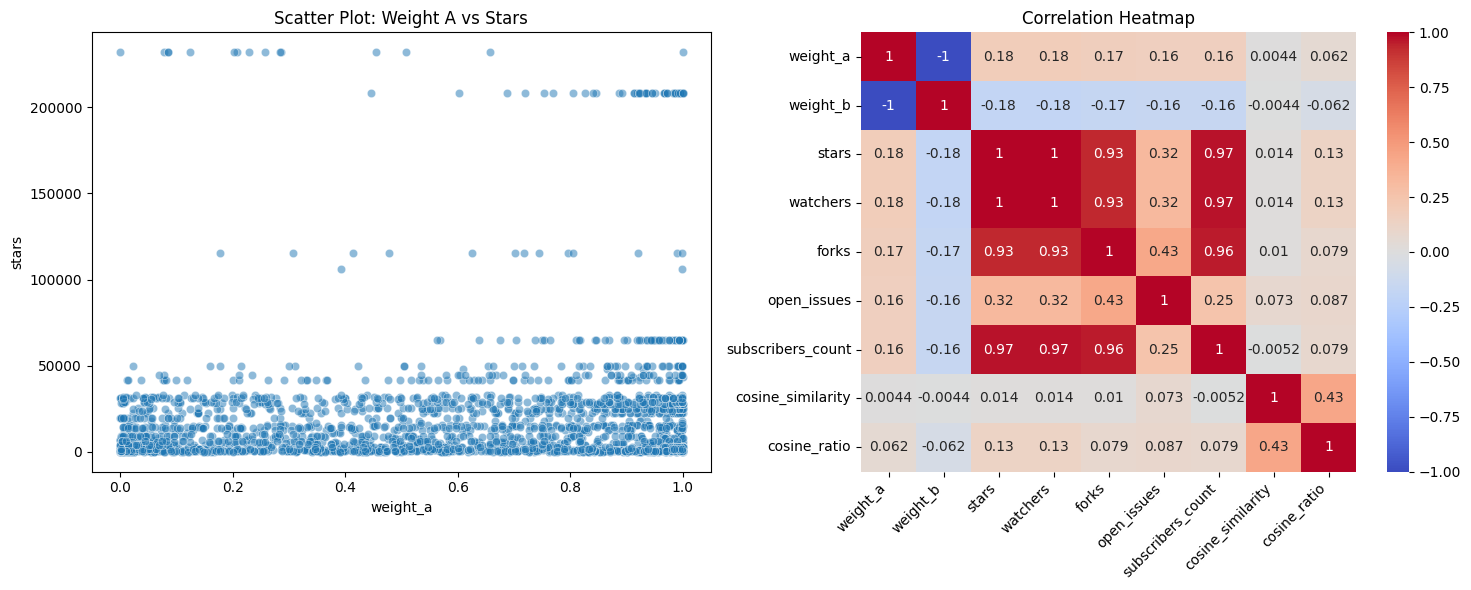


Pearson correlation coefficient between weight_a and stars: 0.182
Correlation statistics:
r-value: 0.182
p-value: 3.225e-19


In [30]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot
sns.scatterplot(data=df_train, 
                x='weight_a', 
                y='stars',
                alpha=0.5,  # Add transparency to see density better
                ax=ax1)
ax1.set_title('Scatter Plot: Weight A vs Stars')

# Correlation heatmap
# Select numerical columns you want to analyze
correlation_columns = ['weight_a', 'weight_b', 'stars', 'watchers', 
                      'forks', 'open_issues', 'subscribers_count',
                      'cosine_similarity', 'cosine_ratio']
correlation_matrix = df_train[correlation_columns].corr()

# Create heatmap
sns.heatmap(correlation_matrix, 
            annot=True,        # Show correlation values
            cmap='coolwarm',   # Red-Blue colormap
            center=0,          # Center the colormap at 0
            vmin=-1, vmax=1,   # Set the range of correlations
            ax=ax2)
ax2.set_title('Correlation Heatmap')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print the correlation coefficient between weight_a and stars
correlation = df_train['weight_a'].corr(df_train['stars'])
print(f"\nPearson correlation coefficient between weight_a and stars: {correlation:.3f}")

# Optional: Show detailed correlation statistics using scipy
from scipy import stats
correlation_stats = stats.pearsonr(df_train['weight_a'], df_train['stars'])
print(f"Correlation statistics:")
print(f"r-value: {correlation_stats[0]:.3f}")
print(f"p-value: {correlation_stats[1]:.3e}")

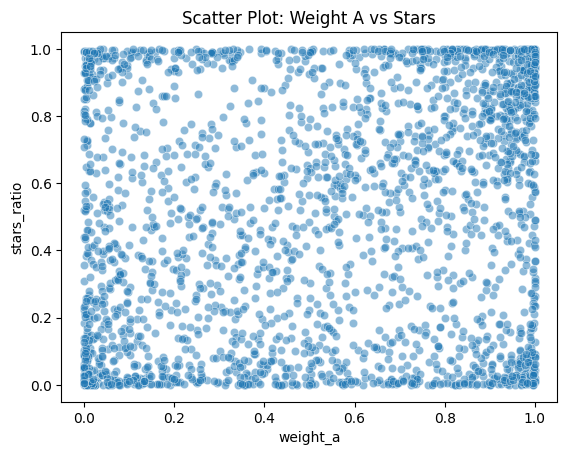

In [38]:
# Scatter plot
sns.scatterplot(data=df_train, 
                x='weight_a', 
                y='stars_ratio',
                alpha=0.5,  # Add transparency to see density better
                )
plt.title('Scatter Plot: Weight A vs Stars')
plt.show()

In [32]:
features = [
   "size", 
   "size_b", 
   "size_ratio",
   "stars", 
   "stars_b", 
   "stars_ratio",
   "watchers",
   "watchers_b",
   "watchers_ratio",
   "forks", 
   "forks_b", 
   "forks_ratio", 
   "open_issues", 
   "open_issues_b", 
   "issues_ratio",
   "subscribers_count", 
   "subscribers_count_b",  
   "subscribers_ratio",
   "commit_code",
   "commit_code_b",
   "commits_ratio",
   "forked",
   "forked_b",
   "forked_ratio",
   "issue_closed",
   "issue_closed_b",
   "issue_closed_ratio",
   "issue_comment",
   "issue_comment_b",
   "issue_comment_ratio",
   "issue_opened",
   "issue_opened_b",
   "issue_opened_ratio",
   "issue_reopened",
   "issue_reopened_b",
   "issue_reopened_ratio",
   "pull_request_closed",
   "pull_request_closed_b",
   "pull_request_closed_ratio",
   "pull_request_merged",
   "pull_request_merged_b",
   "pull_request_merged_ratio",
   "pull_request_opened",
   "pull_request_opened_b",
   "pull_request_opened_ratio",
   "pull_request_reopened",
   "pull_request_reopened_b",
   "pull_request_reopened_ratio",
   "pull_request_review_comment",
   "pull_request_review_comment_b",
   "pull_request_review_comment_ratio",
   "release_published",
   "release_published_b",
   "release_published_ratio",
   "starred",
   "starred_b",
   "starred_ratio",
   "v_index",
   "v_index_b",
   "v_index_ratio",
   "stars_intersection_v_index",
   "stars_b_intersection_v_index_b",
   "stars_ratio_intersection_v_index_ratio",
   "cosine_similarity",
   "cosine_similarity_b",
   "cosine_ratio",
   "num_dependents",
   "num_dependents_b",
   "dependency_rank",
   "dependency_rank_b",
   "num_dependents_ratio",
]

In [33]:
ratio_features = [feature for feature in features if "ratio" in feature]

<Figure size 1200x800 with 0 Axes>

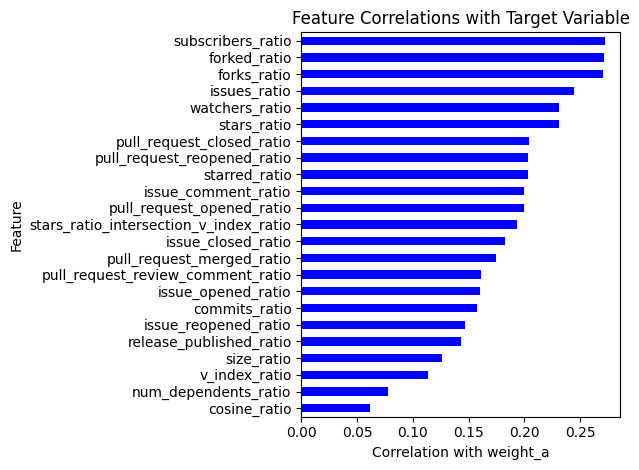


Top 10 most correlated features:
                          feature  correlation
                     cosine_ratio     0.061777
             num_dependents_ratio     0.077897
                    v_index_ratio     0.113501
                       size_ratio     0.126214
          release_published_ratio     0.143092
             issue_reopened_ratio     0.146892
                    commits_ratio     0.157806
               issue_opened_ratio     0.160068
pull_request_review_comment_ratio     0.161384
        pull_request_merged_ratio     0.174736


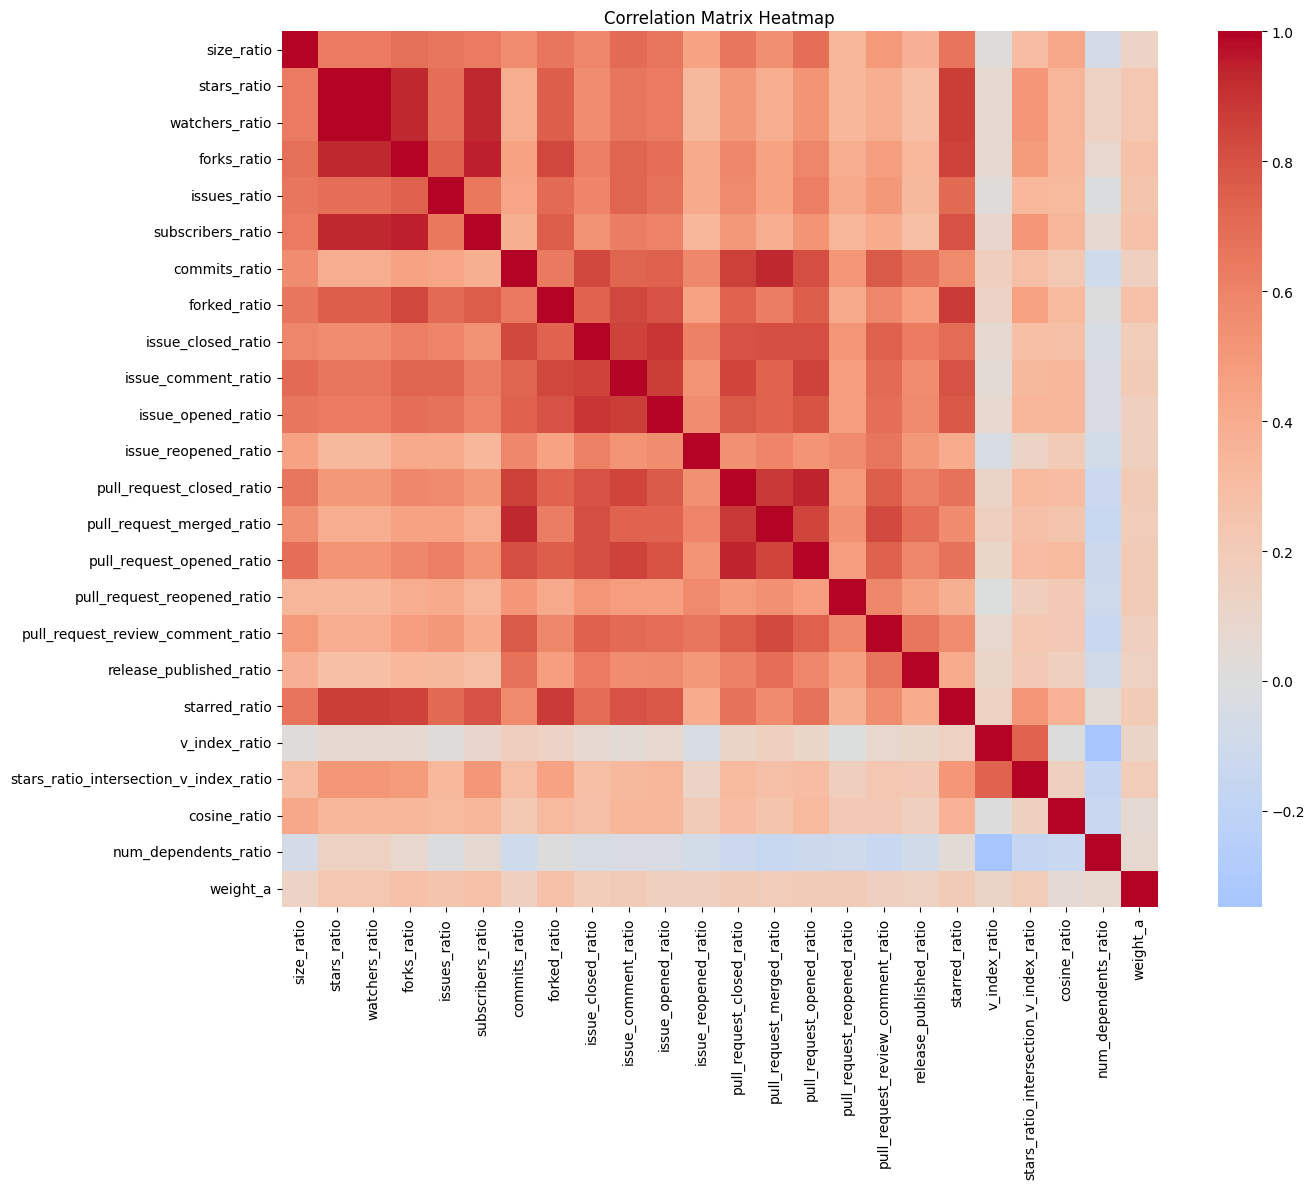

In [35]:
# Calculate correlations with target variable
correlations = pd.DataFrame({
    'feature': ratio_features,
    'correlation': [df_train[feature].corr(df_train['weight_a']) for feature in ratio_features]
})

# Sort by absolute correlation value
correlations['abs_correlation'] = correlations['correlation'].abs()
correlations = correlations.sort_values('abs_correlation', ascending=True)

# Plot correlations
plt.figure(figsize=(12, 8))
colors = ['red' if x < 0 else 'blue' for x in correlations['correlation']]
correlations.plot.barh(x='feature', y='correlation', color=colors, legend=False)
plt.xlabel('Correlation with weight_a')
plt.ylabel('Feature')
plt.title('Feature Correlations with Target Variable')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

# Print top 10 most correlated features
print("\nTop 10 most correlated features:")
print(correlations.head(10)[['feature', 'correlation']].to_string(index=False))

# Calculate correlation matrix for all features
correlation_matrix = df_train[ratio_features + ['weight_a']].corr()

# Create a heatmap of correlations
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, 
            cmap='coolwarm',
            center=0,
            annot=False,  # Set to True if you want to see numbers, but might be too crowded
            fmt='.2f',
            square=True)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()